# E-Commerce Sales Forecast

In [31]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import calendar
import warnings
warnings.filterwarnings('ignore')

In [2]:
order = pd.read_csv("List of Orders.csv")
order.head()

,Order ID,Order Date,CustomerName,State,City
0,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad
1,B-25602,01-04-2018,Pearl,Maharashtra,Pune
2,B-25603,03-04-2018,Jahan,Madhya Pradesh,Bhopal
3,B-25604,03-04-2018,Divsha,Rajasthan,Jaipur
4,B-25605,05-04-2018,Kasheen,West Bengal,Kolkata


In [3]:
details = pd.read_csv("Order Details.csv")
details.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,1275.0,-1148.0,7,Furniture,Bookcases
1,B-25601,66.0,-12.0,5,Clothing,Stole
2,B-25601,8.0,-2.0,3,Clothing,Hankerchief
3,B-25601,80.0,-56.0,4,Electronics,Electronic Games
4,B-25602,168.0,-111.0,2,Electronics,Phones


In [4]:
target = pd.read_csv("Sales target.csv")
target.head()

,Month of Order Date,Category,Target
0,Apr-18,Furniture,10400.0
1,May-18,Furniture,10500.0
2,Jun-18,Furniture,10600.0
3,Jul-18,Furniture,10800.0
4,Aug-18,Furniture,10900.0


### Data Cleaning

In [5]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order ID      500 non-null    object
 1   Order Date    500 non-null    object
 2   CustomerName  500 non-null    object
 3   State         500 non-null    object
 4   City          500 non-null    object
dtypes: object(5)
memory usage: 22.0+ KB


In [6]:
# Changing the Order Date variable to datetime data type
order['Order Date'] = order['Order Date'].astype('datetime64[ns]')

In [7]:
# Checking null values
order.isnull().sum()

Order ID        60
Order Date      60
CustomerName    60
State           60
City            60
dtype: int64

In [8]:
# Droping Null Values
order = order.dropna()
order.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      500 non-null    object        
 1   Order Date    500 non-null    datetime64[ns]
 2   CustomerName  500 non-null    object        
 3   State         500 non-null    object        
 4   City          500 non-null    object        
dtypes: datetime64[ns](1), object(4)
memory usage: 23.4+ KB


In [9]:
details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order ID      1500 non-null   object 
 1   Amount        1500 non-null   float64
 2   Profit        1500 non-null   float64
 3   Quantity      1500 non-null   int64  
 4   Category      1500 non-null   object 
 5   Sub-Category  1500 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 70.4+ KB


In [10]:
# Null values
details.isnull().sum()

Order ID        0
Amount          0
Profit          0
Quantity        0
Category        0
Sub-Category    0
dtype: int64

In [11]:
# Chaning the Category and Sub-category variable to categorical data type
details['Category'] = details['Category'].astype('category')
details['Sub-Category'] = details['Sub-Category'].astype('category')
details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Order ID      1500 non-null   object  
 1   Amount        1500 non-null   float64 
 2   Profit        1500 non-null   float64 
 3   Quantity      1500 non-null   int64   
 4   Category      1500 non-null   category
 5   Sub-Category  1500 non-null   category
dtypes: category(2), float64(2), int64(1), object(1)
memory usage: 50.7+ KB


In [12]:
target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Month of Order Date  36 non-null     object 
 1   Category             36 non-null     object 
 2   Target               36 non-null     float64
dtypes: float64(1), object(2)
memory usage: 992.0+ bytes


In [13]:
# Coverting Category variable to category data
target['Category'] = target['Category'].astype('category')
target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Month of Order Date  36 non-null     object  
 1   Category             36 non-null     category
 2   Target               36 non-null     float64 
dtypes: category(1), float64(1), object(1)
memory usage: 872.0+ bytes


Now, we will be making a new dataframe containing the Amount, Profit and Quantity of the different orders. Then joining it with the Order datasets by taking Order ID as the Primary Key.

In [14]:
profit = details.groupby('Order ID').sum().reset_index()
profit.head()

,Order ID,Amount,Profit,Quantity
0,B-25601,1429.0,-1218.0,19
1,B-25602,3889.0,975.0,22
2,B-25603,2025.0,-180.0,25
3,B-25604,222.0,22.0,11
4,B-25605,75.0,0.0,7


In [15]:
df = pd.merge(order, profit)
df.head()

,Order ID,Order Date,CustomerName,State,City,Amount,Profit,Quantity
0,B-25601,2018-01-04,Bharat,Gujarat,Ahmedabad,1429.0,-1218.0,19
1,B-25602,2018-01-04,Pearl,Maharashtra,Pune,3889.0,975.0,22
2,B-25603,2018-03-04,Jahan,Madhya Pradesh,Bhopal,2025.0,-180.0,25
3,B-25604,2018-03-04,Divsha,Rajasthan,Jaipur,222.0,22.0,11
4,B-25605,2018-05-04,Kasheen,West Bengal,Kolkata,75.0,0.0,7


### Sales Analysis

In [16]:
df['Year'] = pd.DatetimeIndex(df['Order Date']).year
df['Month_Number'] = pd.DatetimeIndex(df['Order Date']).month
df['Month'] = df['Month_Number'].apply(lambda x: calendar.month_abbr[x])

year_month = df.groupby(['Year', 'Month','Month_Number']).sum().sort_values(['Year','Month_Number'])
year_month

Amount  Profit  Quantity
Year Month Month_Number                           
2018 Jan   1             18035.0 -3296.0       203
     Feb   2              6566.0   685.0        58
     Mar   3              7434.0   669.0       144
     Apr   4             26170.0 -1043.0       337
     May   5             20422.0  -891.0       306
     Jun   6             17406.0 -3759.0       353
     Jul   7             15682.0 -2065.0       239
     Aug   8             45269.0 -1059.0       601
     Sep   9             20210.0 -3509.0       310
     Oct   10            32758.0  5979.0       414
     Nov   11            38858.0  4955.0       433
     Dec   12            23892.0  1535.0       209
2019 Jan   1             50448.0  8655.0       640
     Feb   2             15894.0  2291.0       253
     Mar   3             39700.0  6633.0       485
     Apr   4             11079.0  1295.0       106
     May   5              4390.0   943.0        63
     Jun   6              3392.0   700.0        52
     Jul   7              5116.0   975.0        67
     Aug   8              6557.0   594.0        83
     Sep   9              5583.0  1597.0        70
     Oct   10            14147.0  1892.0       149
     Nov   11             2235.0   122.0        35
     Dec   12              259.0    57.0         5

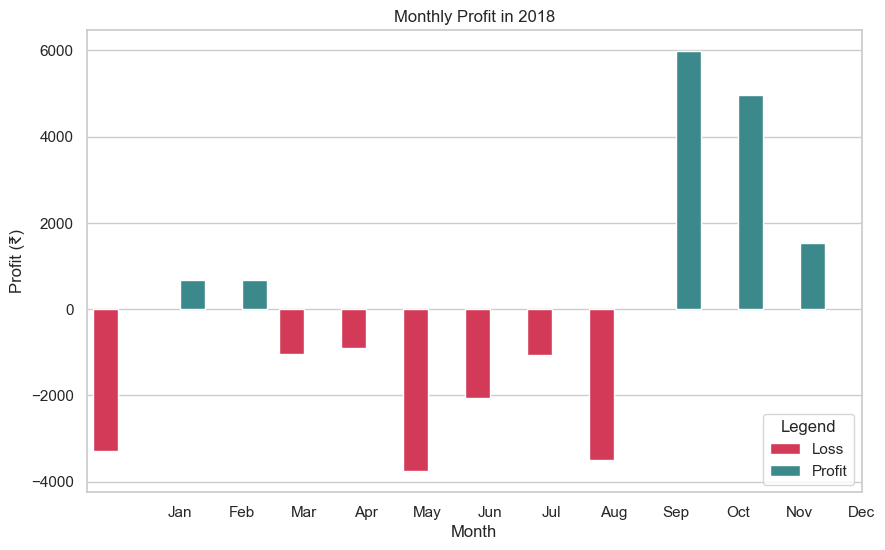

In [37]:
year_month['Legend'] = np.where(year_month['Profit'] < 0, 'Loss', 'Profit')

year_month_2018 = year_month[year_month['Year'] == 2018]

sns.set(style="whitegrid")


plt.figure(figsize=(10, 6))
sns.barplot(x='Month_Number', y='Profit', hue='Legend', data=year_month_2018,
            palette={'Loss': '#EC2049', 'Profit': '#2F9599'})

plt.title('Monthly Profit in 2018')
plt.xlabel('Month')
plt.ylabel('Profit (₹)')
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
           ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.show()

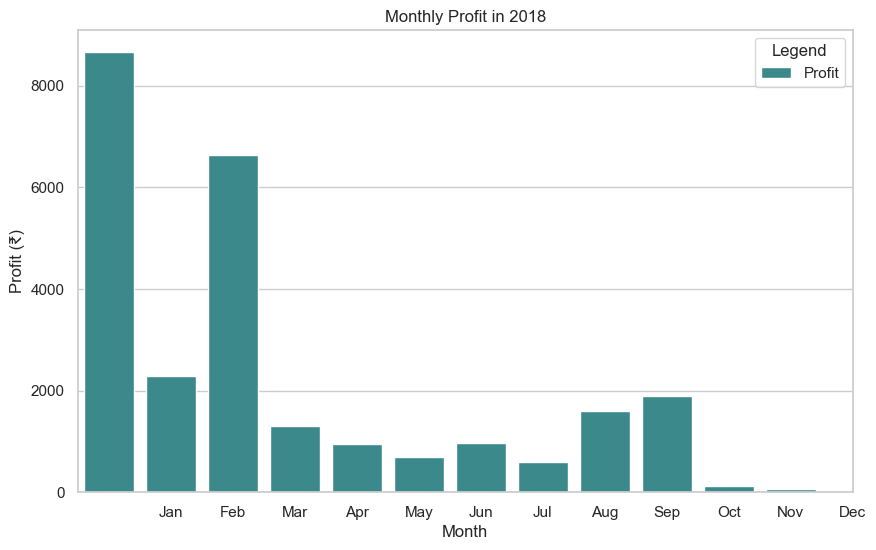

In [38]:
year_month['Legend'] = np.where(year_month['Profit'] < 0, 'Loss', 'Profit')

year_month_2019 = year_month[year_month['Year'] == 2019]

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(x='Month_Number', y='Profit', hue='Legend', data=year_month_2019,
            palette={'Loss': '#EC2049', 'Profit': '#2F9599'})

plt.title('Monthly Profit in 2018')
plt.xlabel('Month')
plt.ylabel('Profit (₹)')
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
           ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.show()

In [33]:
orders_by_state = order.groupby(['State']).size().reset_index(name='Total Orders').sort_values(['Total Orders'])
orders_by_state

,State,Total Orders
16,Tamil Nadu,8
15,Sikkim,12
3,Goa,14
5,Haryana,14
6,Himachal Pradesh,14
7,Jammu and Kashmir,14
0,Andhra Pradesh,15
12,Nagaland,15
9,Kerala,16
1,Bihar,16


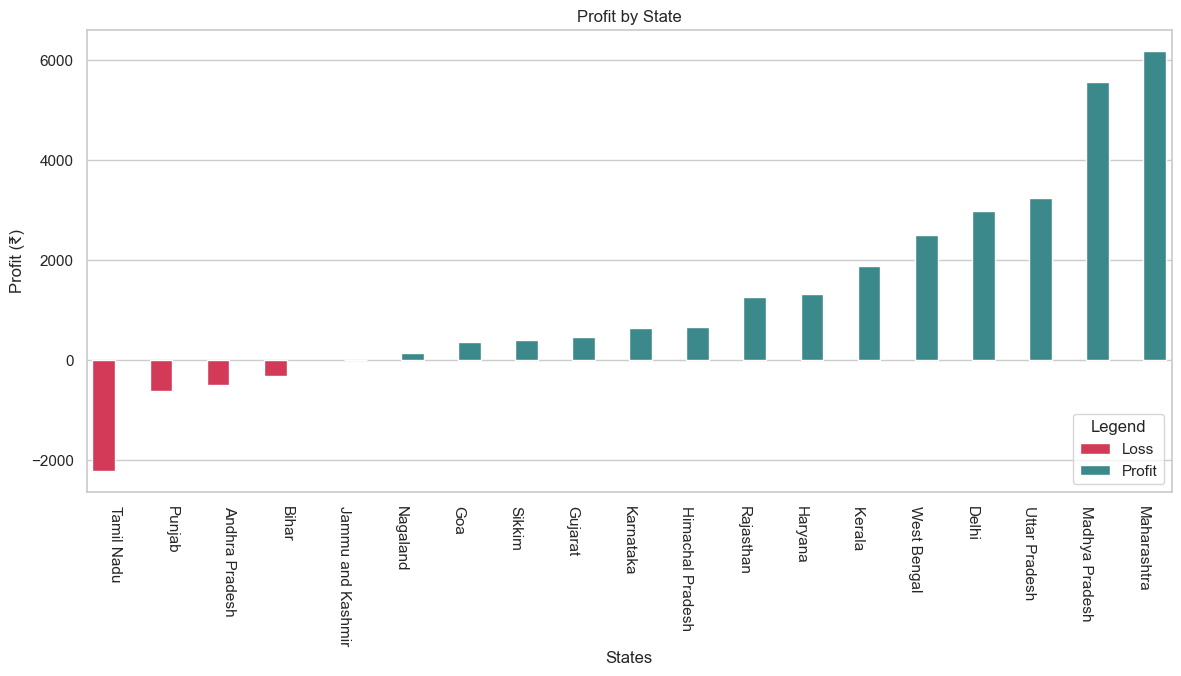

In [39]:
profit_by_state = df.groupby('State').sum().reset_index().sort_values('Profit')
profit_by_state['Legend'] = np.where(profit_by_state['Profit'] < 0, 'Loss', 'Profit')
sns.set(style="whitegrid")


plt.figure(figsize=(14, 6))
sns.barplot(x='State', y='Profit', hue='Legend', data=profit_by_state,
            palette={'Loss': '#EC2049', 'Profit': '#2F9599'})


plt.title('Profit by State')
plt.xlabel('States')
plt.ylabel('Profit (₹)')
plt.xticks(rotation=-90)


plt.show()

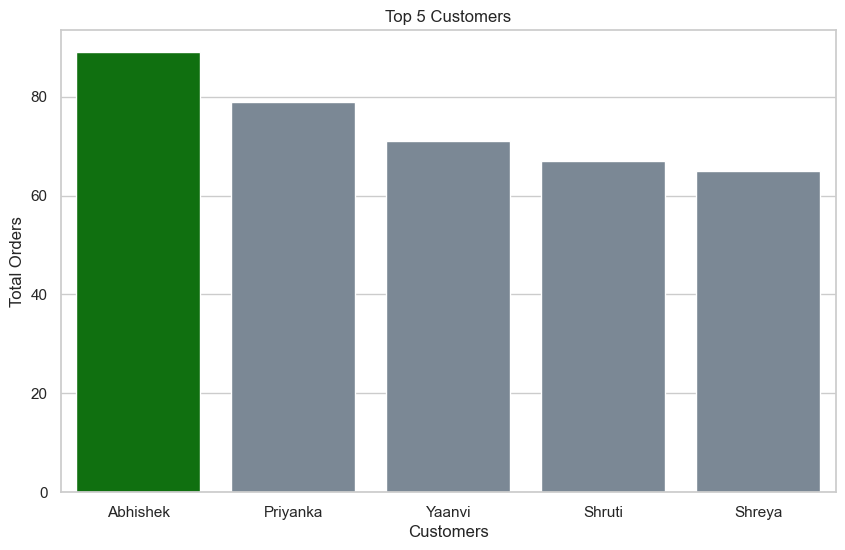

In [40]:
top_customers = df.groupby('CustomerName').sum().reset_index().sort_values('Quantity', ascending=False).head(5)

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(x='CustomerName', y='Quantity', data=top_customers, palette=['green' if i == 0 else 'lightslategray' for i in range(5)])

plt.title('Top 5 Customers')
plt.xlabel('Customers')
plt.ylabel('Total Orders')

plt.show()

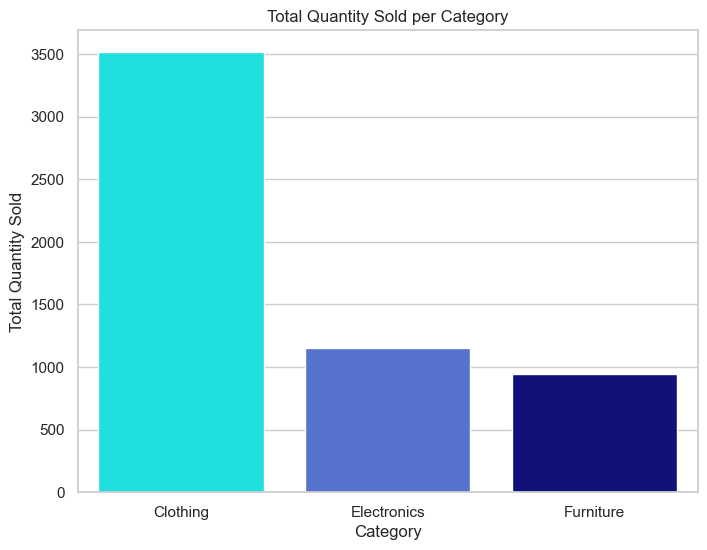

In [41]:
details_category = details.groupby('Category').sum().reset_index()

sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.barplot(x='Category', y='Quantity', data=details_category,
            palette={'Clothing': 'cyan', 'Electronics': 'royalblue', 'Furniture': 'darkblue'})

plt.title('Total Quantity Sold per Category')
plt.xlabel('Category')
plt.ylabel('Total Quantity Sold')

plt.show()

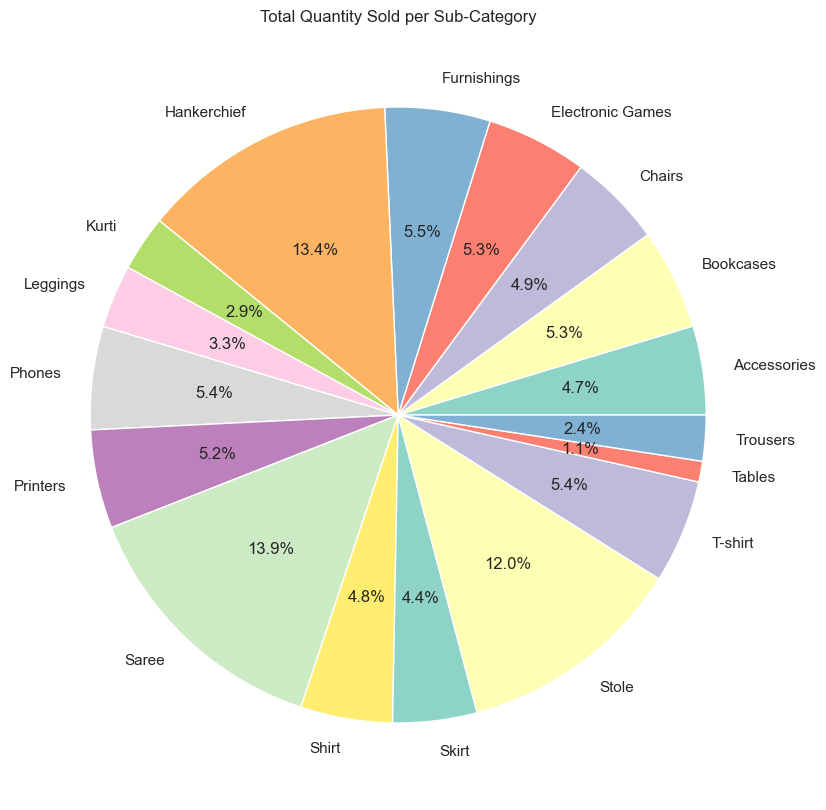

In [42]:
details_subcategory = details.groupby('Sub-Category').sum().reset_index()


sns.set(style="whitegrid")

plt.figure(figsize=(10, 10))
plt.pie(details_subcategory['Quantity'], labels=details_subcategory['Sub-Category'],
        autopct='%1.1f%%', colors=sns.color_palette('Set3'))

plt.title('Total Quantity Sold per Sub-Category')

plt.show()

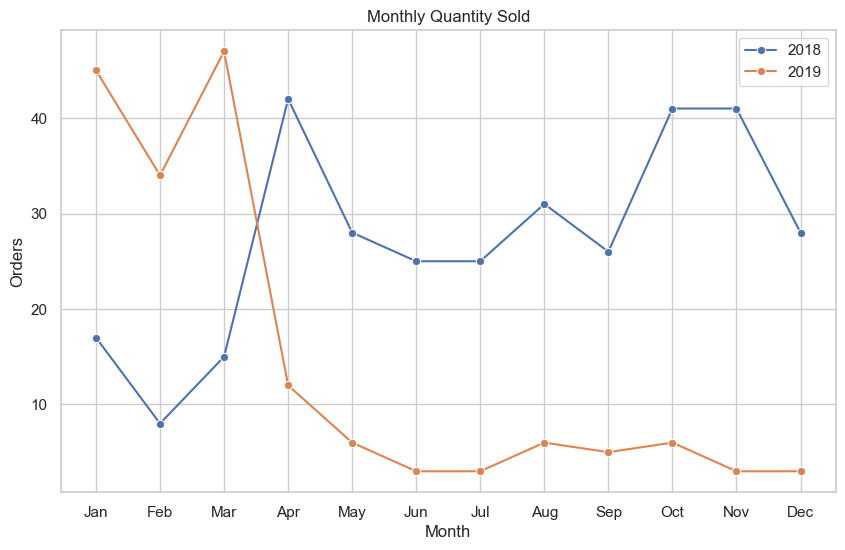

In [43]:
date_orders = order.groupby('Order Date').size().reset_index(name='Orders')
date_orders['Month'] = pd.DatetimeIndex(date_orders['Order Date']).month
date_orders['Year'] = pd.DatetimeIndex(date_orders['Order Date']).year

date_orders_2018 = date_orders[date_orders['Year'] == 2018]
date_orders_2019 = date_orders[date_orders['Year'] == 2019]

month_2018 = date_orders_2018.groupby('Month').sum().reset_index()
month_2019 = date_orders_2019.groupby('Month').sum().reset_index()

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Orders', data=month_2018, label='2018', marker='o')
sns.lineplot(x='Month', y='Orders', data=month_2019, label='2019', marker='o')

plt.title('Monthly Quantity Sold')
plt.xlabel('Month')
plt.ylabel('Orders')
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.legend()
plt.show()

### Customer Demographic Analysis

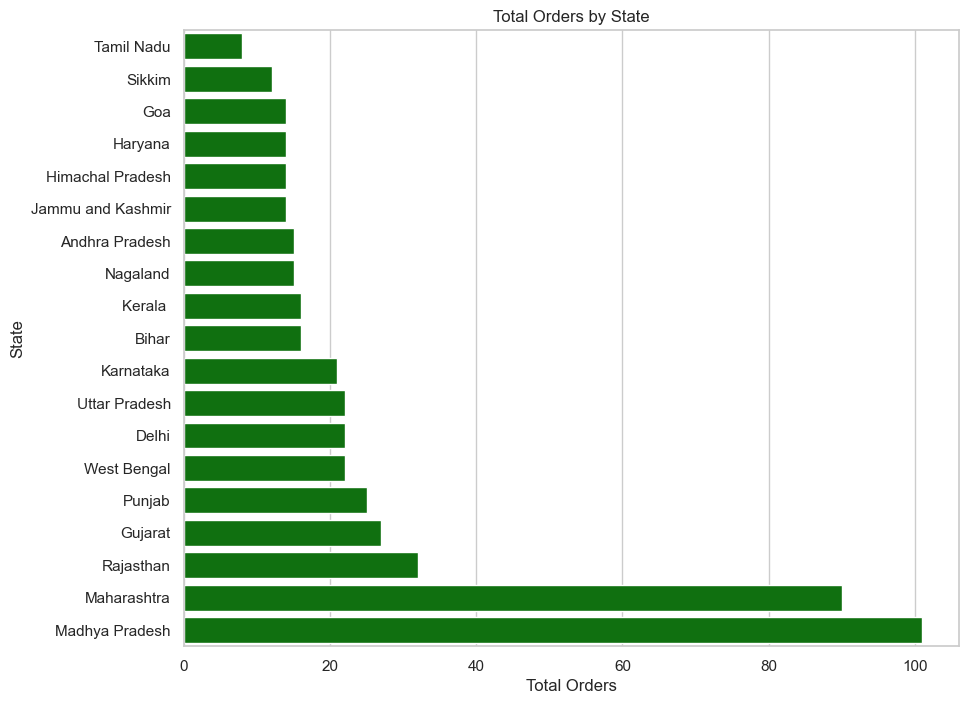

In [44]:
plt.figure(figsize=(10, 8))
sns.barplot(x='Total Orders', y='State', data=orders_by_state, color='green')

plt.title('Total Orders by State')
plt.xlabel('Total Orders')
plt.ylabel('State')

plt.show()

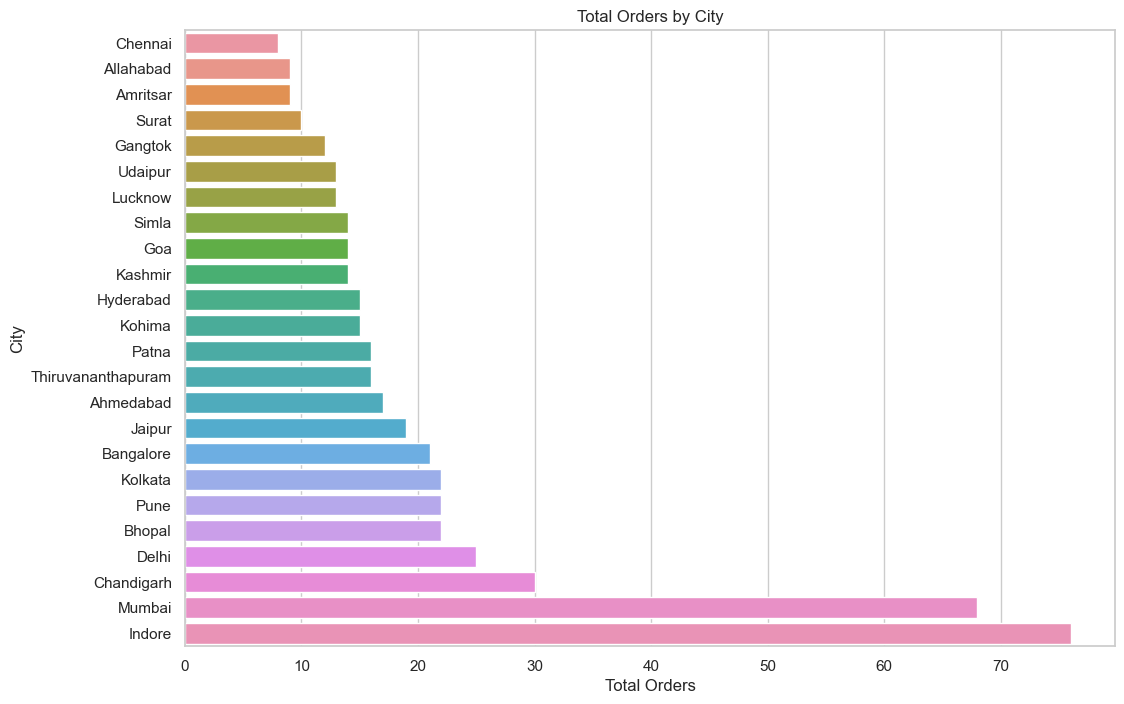

In [45]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Total Orders', y='City', data=orders_by_city)

plt.title('Total Orders by City')
plt.xlabel('Total Orders')
plt.ylabel('City')

plt.show()

### Sales Target

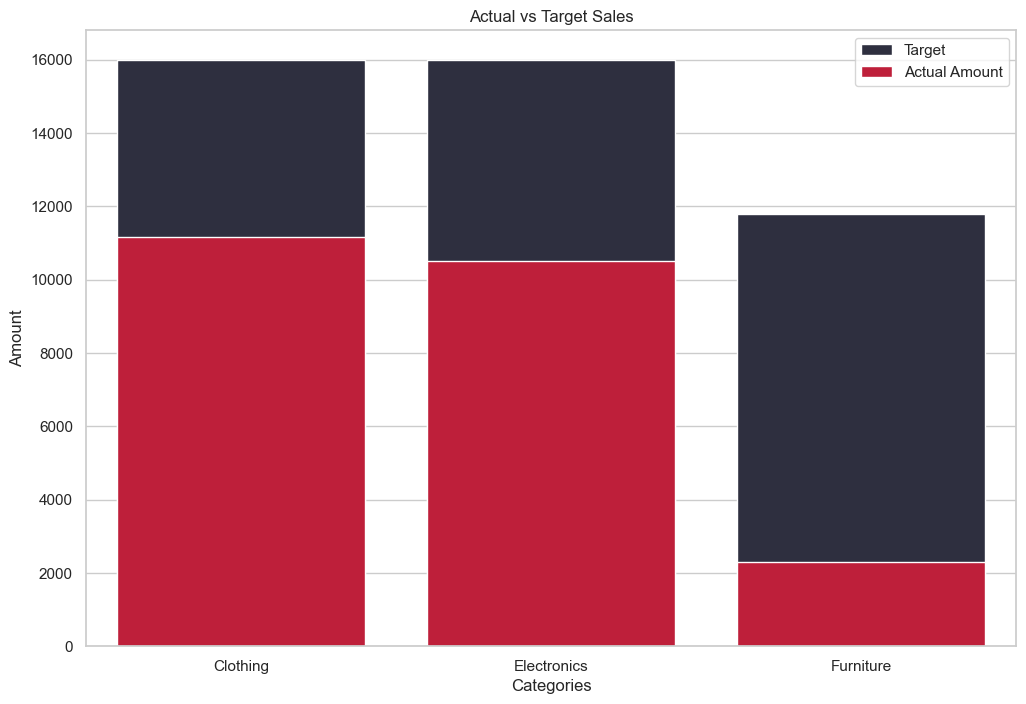

In [46]:
merged_data = pd.merge(target_category, details_category, on='Category', how='inner')

plt.figure(figsize=(12, 8))
sns.barplot(x='Category', y='Target', data=merged_data, color='#2b2d42', label='Target')
sns.barplot(x='Category', y='Profit', data=merged_data, color='#d90429', label='Actual Amount')

plt.title('Actual vs Target Sales')
plt.xlabel('Categories')
plt.ylabel('Amount')
plt.legend()

plt.show()

### Time Series Forecasting

In [47]:
from prophet import Prophet

In [48]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
summed_sales = df.groupby(df['Order Date'].dt.to_period("M"))['Profit'].sum().reset_index()
summed_sales['Order Date'] = summed_sales['Order Date'].dt.to_timestamp().dt.strftime('%Y--%m--%d')
summed_sales.columns = ['Date', 'Profit']
summed_sales

,Date,Profit
0,2018--01--01,-3296.0
1,2018--02--01,685.0
2,2018--03--01,669.0
3,2018--04--01,-1043.0
4,2018--05--01,-891.0
5,2018--06--01,-3759.0
6,2018--07--01,-2065.0
7,2018--08--01,-1059.0
8,2018--09--01,-3509.0
9,2018--10--01,5979.0


Prophet imposes the strict condition that the input columns must be named as ds (the time column) and y (the metric column).

So, we must rename the columns in our dataframe

In [49]:
summed_sales = summed_sales.rename(columns={'Date': 'ds',
                        'Profit': 'y'})

summed_sales.head()

,ds,y
0,2018--01--01,-3296.0
1,2018--02--01,685.0
2,2018--03--01,669.0
3,2018--04--01,-1043.0
4,2018--05--01,-891.0


In [52]:
import plotly.express as px

fig = px.line(summed_sales, x='ds', y='y')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
train_data = summed_sales.sample(frac = 0.8, random_state = 10)

In [58]:
validation_data = summed_sales.drop(train_data.index)

print(f'training data size : {train_data.shape}')
print(f'validation data size : {validation_data.shape}')
train_data = train_data.reset_index()
validation_data = validation_data.reset_index()

training data size : (19, 2)
validation data size : (5, 2)


In [60]:
train_data.head()

,index,ds,y
0,5,2018--06--01,-3759.0
1,1,2018--02--01,685.0
2,7,2018--08--01,-1059.0
3,2,2018--03--01,669.0
4,11,2018--12--01,1535.0


In [61]:
validation_data

,index,ds,y
0,0,2018--01--01,-3296.0
1,4,2018--05--01,-891.0
2,9,2018--10--01,5979.0
3,15,2019--04--01,1295.0
4,17,2019--06--01,700.0


In [62]:
model = Prophet()
model.fit(summed_sales)

00:02:08 - cmdstanpy - INFO - Chain [1] start processing
00:02:08 - cmdstanpy - INFO - Chain [1] done processing


We will use the validation data to evaluate our model. We use mean absolute error to measure how our model is
trained.

In [65]:
prediction = model.predict(pd.DataFrame({'ds':validation_data['ds']}))
y_actual = validation_data['y']
y_predicted = prediction['yhat']
y_predicted = y_predicted.astype(int)
mean_absolute_error(y_actual, y_predicted)

2038.8

It gave 2038.8. it means the average error in our actual value and the predicted value is 2038.8.
We can plot the forecasted results and compare them with the actual values.
We are using Plotly interactive plots for visualisation.

In [70]:
from plotly.subplots import make_subplots
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(
 go.Scatter(x=validation_data['ds'], y=y_actual, name="actual targets"),
 secondary_y=False,)
fig.add_trace(
 go.Scatter(x=validation_data['ds'], y=y_predicted, name="predicted targets"),
 secondary_y=True,)
fig.update_layout(
 title_text="Actual vs Predicted Targets")
fig.update_xaxes(title_text="Timeline")
fig.update_yaxes(title_text="actual targets", secondary_y=False)
fig.update_yaxes(title_text="predicted targets", secondary_y=True)
fig.show()

In order to obtain forecasts of our time series, we must provide Prophet with a new DataFrame containing a ds column that holds the dates for which we want predictions.

Conveniently, we do not have to concern ourselves with manually creating this DataFrame, as Prophet provides the make_future_dataframe helper function.

In [69]:
future_dates = model.make_future_dataframe(periods=12, freq='MS')
future_dates.head()

,ds
0,2018-01-01
1,2018-02-01
2,2018-03-01
3,2018-04-01
4,2018-05-01


The DataFrame of future dates is then used as input to the predict method of our fitted model.

In [68]:
forecast = model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2018-01-01,-496.102004,-6134.872133,4768.096158
1,2018-02-01,-363.025794,-5972.791980,5128.277259
2,2018-03-01,-242.827928,-5998.593838,5253.073600
3,2018-04-01,-109.751719,-5761.090058,5815.235001
4,2018-05-01,19.031710,-5540.312359,5611.541920


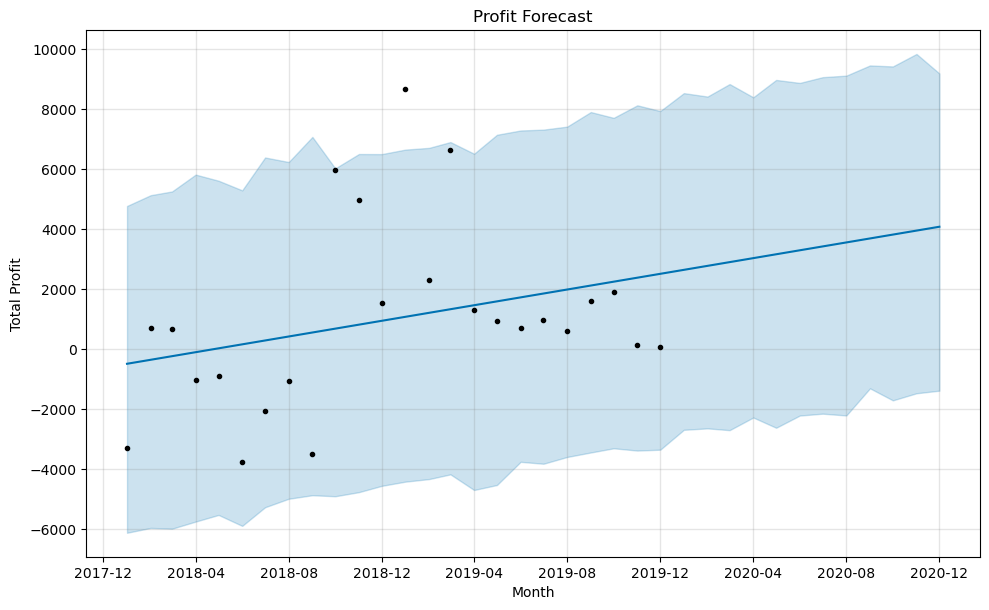

In [69]:
fig = model.plot(forecast)

plt.title('Profit Forecast')
plt.xlabel('Month')
plt.ylabel('Total Profit')
plt.show()

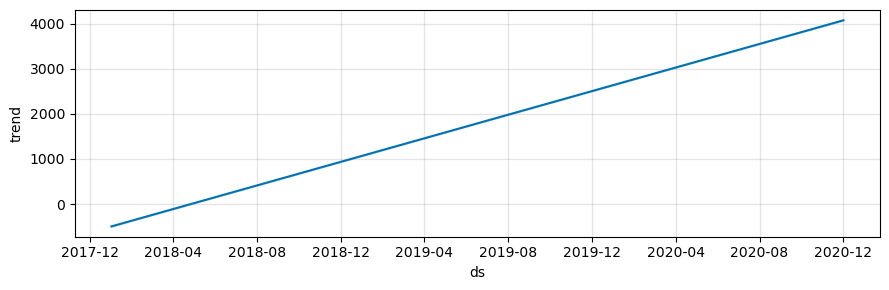

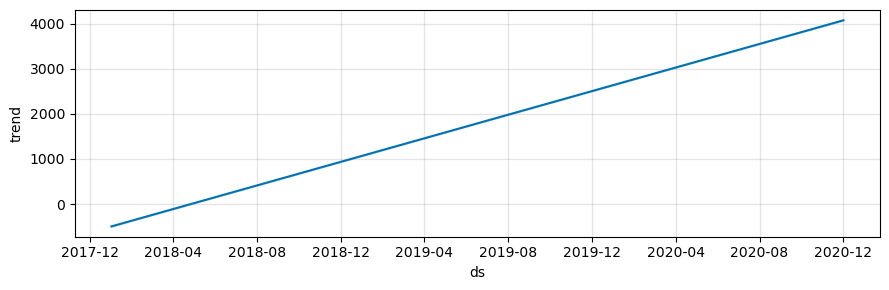

In [71]:
model.plot_components(forecast)

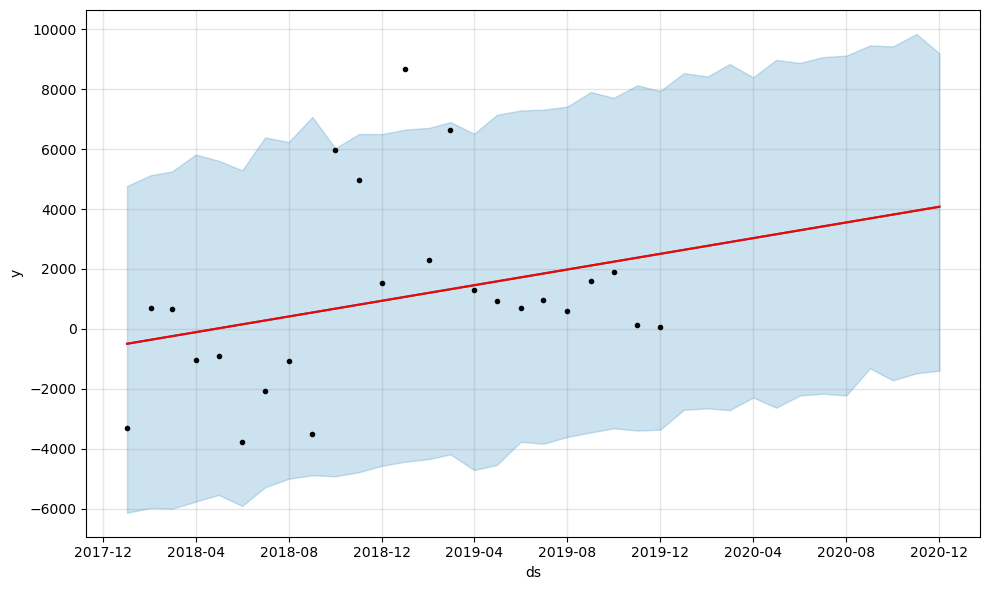

In [73]:
from prophet.plot import add_changepoints_to_plot
fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model, forecast)

In [74]:
model.changepoints

1    2018-02-01
2    2018-03-01
3    2018-04-01
4    2018-05-01
5    2018-06-01
6    2018-07-01
7    2018-08-01
8    2018-09-01
9    2018-10-01
10   2018-11-01
11   2018-12-01
12   2019-01-01
13   2019-02-01
14   2019-03-01
15   2019-04-01
16   2019-05-01
17   2019-06-01
18   2019-07-01
Name: ds, dtype: datetime64[ns]

This time series analysis suggests that the business has experienced steady growth over the past 3 years. The positive trend indicates that the business is profitable, and its profit is increasing annually. The presence of seasonality indicates that the business experiences a pattern in its profit.

However, the prediction model has its limitations. The average profit forecasting method may not capture all the nuances of the business. The actual profit may differ based on factors such as market conditions, competitors, and the business's strategy.

Moreover, it's crucial to analyze the uncertainty and confidence intervals associated with the predictions. This can help the business understand the range of potential outcomes and plan accordingly.

To further improve the analysis, we could consider examining external factors that may influence the business's profit. These could include changes in market conditions, government policies, and consumer preferences. Additionally, it's essential to regularly update the forecast model with new data to ensure its accuracy and relevance.

Lastly, the changepoints identified in the time series data can be further analyzed to identify patterns or trends. This information can provide valuable insights into the business's performance and help inform future strategies.